In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
bid_set = pd.read_csv("datasets/bids.csv")
test_set = pd.read_csv("datasets/test.csv")
train_set = pd.read_csv("datasets/train.csv")

In [3]:
# Check the info
print("Bid Set Info:")
bid_set.info()
print("\nTrain Set Info:")
train_set.info()

Bid Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   bid_id       int64 
 1   bidder_id    object
 2   auction      object
 3   merchandise  object
 4   device       object
 5   time         int64 
 6   country      object
 7   ip           object
 8   url          object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB

Train Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bidder_id        2013 non-null   object 
 1   payment_account  2013 non-null   object 
 2   address          2013 non-null   object 
 3   outcome          2013 non-null   float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB


In [4]:
# View the first few rows of the datasets
print(bid_set.head(), "\n")  
print(train_set.head(), "\n")

   bid_id                              bidder_id auction merchandise  device  \
0       0  8dac2b259fd1c6d1120e519fb1ac14fbqvax8   ewmzr     jewelry  phone0   
1       1  668d393e858e8126275433046bbd35c6tywop   aeqok   furniture  phone1   
2       2  aa5f360084278b35d746fa6af3a7a1a5ra3xe   wa00e  home goods  phone2   
3       3  3939ac3ef7d472a59a9c5f893dd3e39fh9ofi   jefix     jewelry  phone4   
4       4  8393c48eaf4b8fa96886edc7cf27b372dsibi   jefix     jewelry  phone5   

               time country              ip              url  
0  9759243157894736      us   69.166.231.58  vasstdc27m7nks3  
1  9759243157894736      in   50.201.125.84  jmqlhflrzwuay9c  
2  9759243157894736      py  112.54.208.157  vasstdc27m7nks3  
3  9759243157894736      in   18.99.175.133  vasstdc27m7nks3  
4  9759243157894736      in    145.138.5.37  vasstdc27m7nks3   

                               bidder_id  \
0  91a3c57b13234af24875c56fb7e2b2f4rb56a   
1  624f258b49e77713fc34034560f93fb3hu3jo   
2  1c5f

In [5]:
# Check the shape of the datasets
print("\nbid shape:")
print(bid_set.shape)  # Show the shape of the DataFrame
print("\ntrain shape:")
print(train_set.shape)  # Show the shape of the DataFrame


bid shape:
(7656334, 9)

train shape:
(2013, 4)


In [6]:
# # Statistics of the datasets
# print("\nBid Set Statistics:\n", bid_set.describe())
# print("\nTrain Set Statistics:\n", train_set.describe())

In [7]:
# Check for missing values
print("\nMissing Values in Bid Set:\n", bid_set.isnull().sum())
print("\nMissing Values in Train Set:\n", train_set.isnull().sum())


Missing Values in Bid Set:
 bid_id            0
bidder_id         0
auction           0
merchandise       0
device            0
time              0
country        8859
ip                0
url               0
dtype: int64

Missing Values in Train Set:
 bidder_id          0
payment_account    0
address            0
outcome            0
dtype: int64


In [9]:
missing_percent = bid_set['country'].isnull().mean()
print(f"\nPercentage of missing data in country column: {missing_percent*100: .2f}%")


Percentage of missing data in country column:  0.12%


In [10]:
# unique_countries = bid_set['country'].value_counts()
# filling missing values with the mode
bid_set['country'] = bid_set['country'].fillna(bid_set['country'].mode()[0])

In [13]:
merged_df = pd.merge(train_set, bid_set, on='bidder_id', how='left')
missing_values_count = merged_df.isnull().sum()
print("\nMissing Value count after merged: \n" , missing_values_count )


Missing Value count after merged: 
 bidder_id           0
payment_account     0
address             0
outcome             0
bid_id             29
auction            29
merchandise        29
device             29
time               29
country            29
ip                 29
url                29
dtype: int64


In [14]:
# Check the percentage of missing values in each column
missing_values_ratio = merged_df.isnull().sum() / len(merged_df) * 100
print("\nMissing Values Ratio:\n", missing_values_ratio)


Missing Values Ratio:
 bidder_id          0.000000
payment_account    0.000000
address            0.000000
outcome            0.000000
bid_id             0.000944
auction            0.000944
merchandise        0.000944
device             0.000944
time               0.000944
country            0.000944
ip                 0.000944
url                0.000944
dtype: float64


In [15]:
# for all the missing value observation, drop it
merged_df = merged_df.dropna()
missing_values_count_dropped = merged_df.isnull().sum()
print("\nMissing Values Count after dropping rows with missing values:\n", missing_values_count_dropped )


Missing Values Count after dropping rows with missing values:
 bidder_id          0
payment_account    0
address            0
outcome            0
bid_id             0
auction            0
merchandise        0
device             0
time               0
country            0
ip                 0
url                0
dtype: int64


## EDA

In [16]:
# EDA
# Distribution of auction outcomes
outcome_counts = merged_df['outcome'].value_counts()

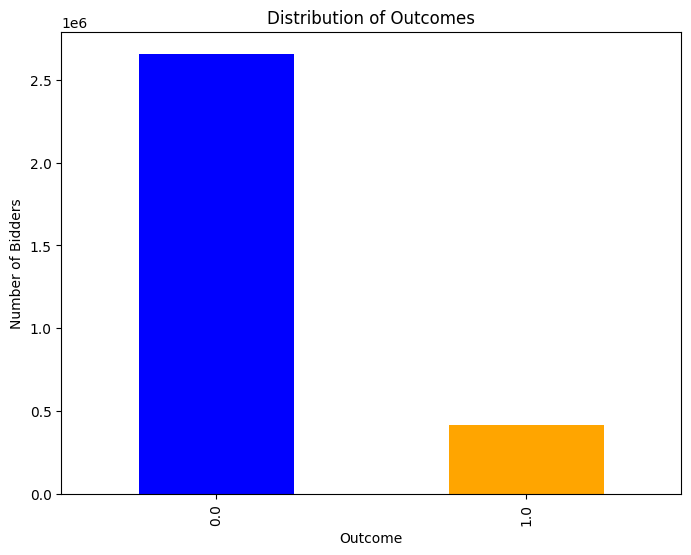

In [17]:
# Visualizing the distribution of auction outcomes
plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Bidders')
plt.show()

In [18]:
# Visualizing the top 10 merchandise types with the highest number of bids per label (outcome)
plt.figure(figsize=(14, 8))
top_merchandise_by_label = merged_df.groupby(['outcome', 'merchandise']).size().nlargest(30).reset_index(name='count')


<Figure size 1400x800 with 0 Axes>

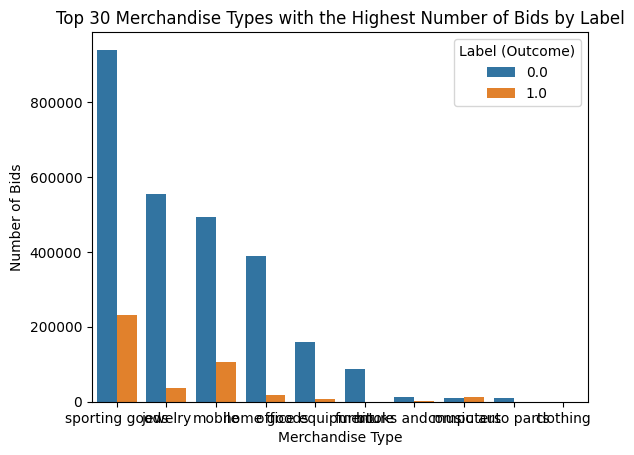

In [19]:
sns.barplot(x='merchandise', y='count', hue='outcome', data=top_merchandise_by_label)
plt.title('Top 30 Merchandise Types with the Highest Number of Bids by Label')
plt.xlabel('Merchandise Type')
plt.ylabel('Number of Bids')
plt.legend(title='Label (Outcome)')
plt.show()

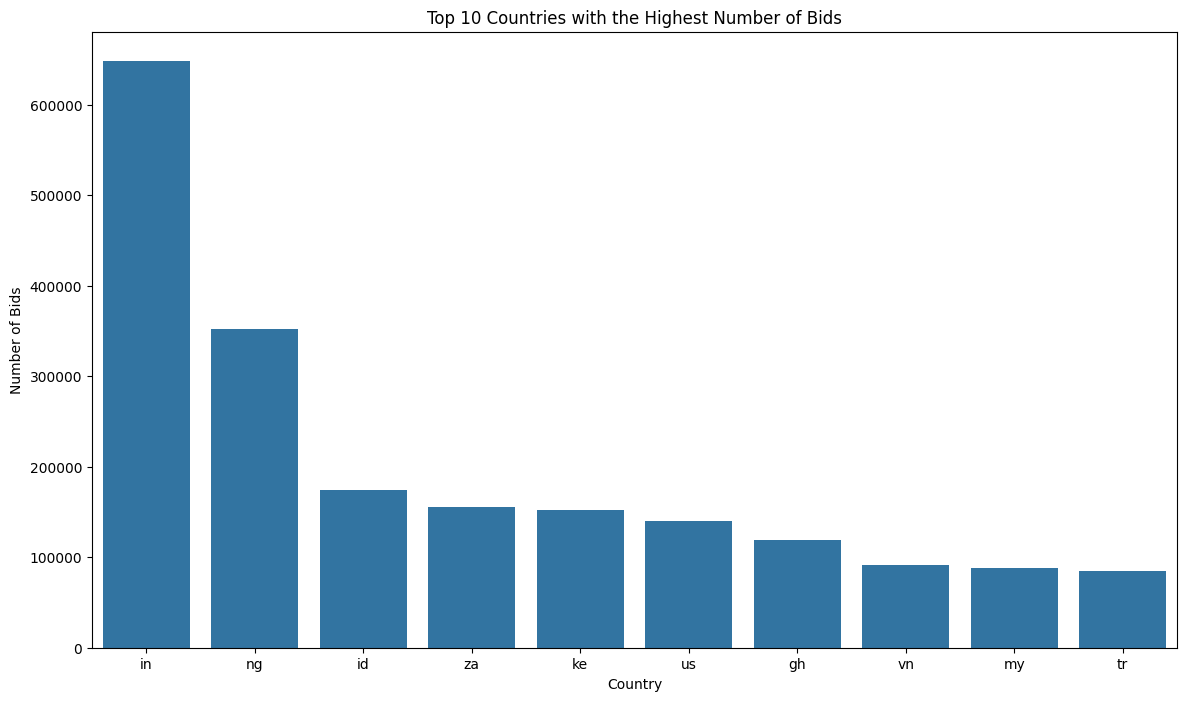

In [20]:
# Visualizing the top 10 countries with the highest number of bids
plt.figure(figsize=(14, 8))
top_countries = merged_df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with the Highest Number of Bids')
plt.xlabel('Country')
plt.ylabel('Number of Bids')
plt.show()

In [21]:
# Visualizing the top 40 countries with the highest number of bids by label (outcome)
plt.figure(figsize=(14, 8))
top_countries_by_label = merged_df.groupby(['outcome', 'country']).size().nlargest(40).reset_index(name='count')

<Figure size 1400x800 with 0 Axes>

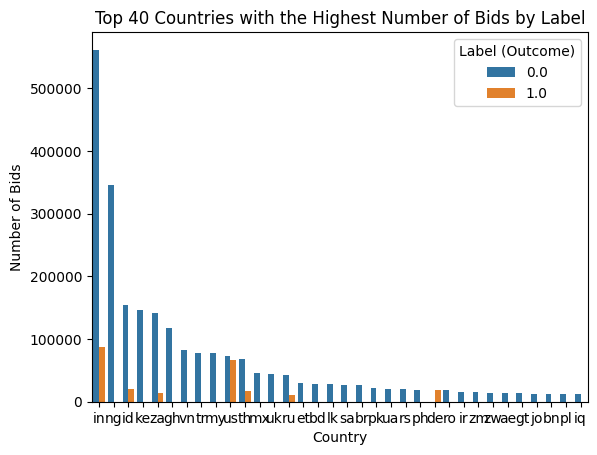

In [22]:
sns.barplot(x='country', y='count', hue='outcome', data=top_countries_by_label)
plt.title('Top 40 Countries with the Highest Number of Bids by Label')
plt.xlabel('Country')
plt.ylabel('Number of Bids')
plt.legend(title='Label (Outcome)')
plt.show()

In [ ]:
# Output merged dataset
# df = pd.DataFrame(data = merged_df)
# df.to_csv("merged_df.csv", index=False)

## Merge test dataset

In [3]:
# Load the datasets
bid_set = pd.read_csv("datasets/bids.csv")
test_set = pd.read_csv("datasets/test.csv")

In [4]:
# Check the info
print("Bid Set Info:")
bid_set.info()
print("\nTest Set Info:")
test_set.info()

Bid Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   bid_id       int64 
 1   bidder_id    object
 2   auction      object
 3   merchandise  object
 4   device       object
 5   time         int64 
 6   country      object
 7   ip           object
 8   url          object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB

Test Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bidder_id        4700 non-null   object
 1   payment_account  4700 non-null   object
 2   address          4700 non-null   object
dtypes: object(3)
memory usage: 110.3+ KB


In [5]:
# View the first few rows of the datasets
print(bid_set.head(), "\n")  
print(test_set.head(), "\n")

   bid_id                              bidder_id auction merchandise  device  \
0       0  8dac2b259fd1c6d1120e519fb1ac14fbqvax8   ewmzr     jewelry  phone0   
1       1  668d393e858e8126275433046bbd35c6tywop   aeqok   furniture  phone1   
2       2  aa5f360084278b35d746fa6af3a7a1a5ra3xe   wa00e  home goods  phone2   
3       3  3939ac3ef7d472a59a9c5f893dd3e39fh9ofi   jefix     jewelry  phone4   
4       4  8393c48eaf4b8fa96886edc7cf27b372dsibi   jefix     jewelry  phone5   

               time country              ip              url  
0  9759243157894736      us   69.166.231.58  vasstdc27m7nks3  
1  9759243157894736      in   50.201.125.84  jmqlhflrzwuay9c  
2  9759243157894736      py  112.54.208.157  vasstdc27m7nks3  
3  9759243157894736      in   18.99.175.133  vasstdc27m7nks3  
4  9759243157894736      in    145.138.5.37  vasstdc27m7nks3   

                               bidder_id  \
0  49bb5a3c944b8fc337981cc7a9ccae41u31d7   
1  a921612b85a1494456e74c09393ccb65ylp4y   
2  6b60

In [6]:
# Check the shape of the datasets
print("\nbid shape:")
print(bid_set.shape)  # Show the shape of the DataFrame
print("\ntest shape:")
print(test_set.shape)  # Show the shape of the DataFrame


bid shape:
(7656334, 9)

test shape:
(4700, 3)


In [7]:
# Check for missing values
print("\nMissing Values in Bid Set:\n", bid_set.isnull().sum())
print("\nMissing Values in Train Set:\n", test_set.isnull().sum())


Missing Values in Bid Set:
 bid_id            0
bidder_id         0
auction           0
merchandise       0
device            0
time              0
country        8859
ip                0
url               0
dtype: int64

Missing Values in Train Set:
 bidder_id          0
payment_account    0
address            0
dtype: int64


In [8]:
missing_percent = bid_set['country'].isnull().mean()
print(f"\nPercentage of missing data in country column: {missing_percent*100: .2f}%")



Percentage of missing data in country column:  0.12%


In [9]:
# filling missing values with the mode
bid_set['country'] = bid_set['country'].fillna(bid_set['country'].mode()[0])

In [10]:
merged_df = pd.merge(test_set, bid_set, on='bidder_id', how='left')
missing_values_count = merged_df.isnull().sum()
print("\nMissing Value count after merged: \n" , missing_values_count )


Missing Value count after merged: 
 bidder_id           0
payment_account     0
address             0
bid_id             70
auction            70
merchandise        70
device             70
time               70
country            70
ip                 70
url                70
dtype: int64


In [11]:
# Check the percentage of missing values in each column
missing_values_ratio = merged_df.isnull().sum() / len(merged_df) * 100
print("\nMissing Values Ratio:\n", missing_values_ratio)


Missing Values Ratio:
 bidder_id          0.000000
payment_account    0.000000
address            0.000000
bid_id             0.001527
auction            0.001527
merchandise        0.001527
device             0.001527
time               0.001527
country            0.001527
ip                 0.001527
url                0.001527
dtype: float64


In [22]:
# Extract the bidder_ids with missing information
bidder_ids_na = merged_df[merged_df['bid_id'].isnull()]
bidder_ids_na.shape

(70, 11)

In [23]:
bidder_ids_na = bidder_ids_na['bidder_id']
bidder_ids_na.head()

59676     b24e3af20453813e821f5a22ff55e072tgton
147427    65489e2734f03652a76bf139df96c479lopnf
147828    3c465a8c5b93301383617e4c539c850aumt08
174804    55a699bd3a83fe99db348c4302ee754ep392w
209357    4b24254e994ad8abcc4b5b4020991960q7j30
Name: bidder_id, dtype: object

In [24]:
bidder_ids_na.shape

(70,)

In [25]:
# Output the bidder_ids_na for future use
bidder_ids_na.to_csv("datasets/bidder_ids_na.csv", index=False)

In [32]:
# for all the missing value observation, drop it
merged_df = merged_df.dropna()
missing_values_count_dropped = merged_df.isnull().sum()
print("\nMissing Values Count after dropping rows with missing values:\n", missing_values_count_dropped )


Missing Values Count after dropping rows with missing values:
 bidder_id          0
payment_account    0
address            0
bid_id             0
auction            0
merchandise        0
device             0
time               0
country            0
ip                 0
url                0
dtype: int64


In [34]:
merged_df.head()

,bidder_id,payment_account,address,bid_id,auction,merchandise,device,time,country,ip,url
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,2714053.0,cl3cf,home goods,phone169,9.633127e+15,us,128.59.117.159,8ohccaw6fhyc1gy
1,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,3785632.0,edggv,home goods,phone65,9.638908e+15,cn,254.171.78.220,vasstdc27m7nks3
2,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,5788255.0,jqx39,home goods,phone65,9.698805e+15,in,102.115.72.52,jezzg7twk0rqfuw
3,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,6575051.0,jqx39,home goods,phone65,9.703350e+15,cn,210.90.145.131,vasstdc27m7nks3
4,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,2536026.0,h2nr3,sporting goods,phone640,9.632413e+15,az,85.169.46.232,vasstdc27m7nks3


In [36]:
# Output merged dataset
# merged_df.to_csv("datasets/test_merged_df.csv", index=False)